### Chapter 2 : Getting Started With Basic Plots

As the saying goes, a picture is 1000 words worth. Hence, visualisation of data plays a critical role in finding hidden patterns in the data. Over a period of time variety of graphs have been developed to represent different relationships among different types of variables. In this chapter we will see how to use these different graphs in different contexts and how to plot them using matplotlib

#### Line Plot
Line plot is used to represent relationship between two continuous variables. It is typically used to represent the trend of a variable over time, e.g. GDP growth rate, Inflation, Interest Rates, Stock Price over quarters and years. All the graphs we have seen in Chapter 1 are examples of line plot.

In [1]:
%matplotlib inline

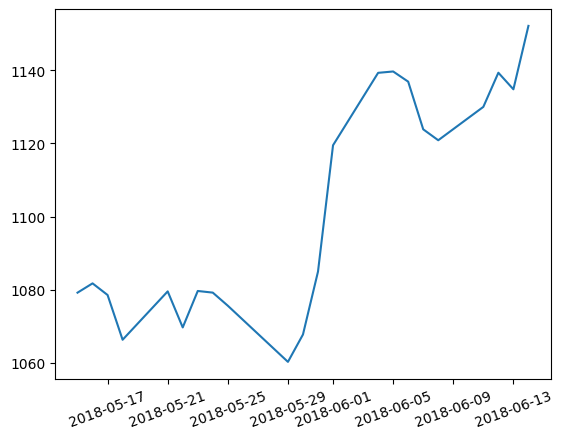

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#Load Google Stock Price file into x, y co-ordinates
stock = pd.read_csv('GOOG.csv', header=None, delimiter=',')

# print(f"stock: {stock}")

# add column names
stock.columns = ['Date','Price']

#convert the Pandas DataFrame into a time series
stock['Date'] = pd.to_datetime(stock['Date'], format='%d-%m-%Y')

#setting date as index for the pandas dataframe
indexed_stock = stock.set_index('Date')
ts = indexed_stock['Price']

# print(f"ts: {ts}")

# plot the graph
plt.plot(ts)
plt.xticks(rotation=20)     # new line added for 3.0

# Display the graph on the screen
plt.show();

In [3]:
!pip install fix_yahoo_finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix_yahoo_finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7073 sha256=9e5a25ac4ac39e98bd114768375e24975fcb6bd09a2b6813c709da2ea0992caa
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix_yahoo_finance


/usr/local/lib/python3.10/dist-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



[*********************100%%**********************]  1 of 1 completed


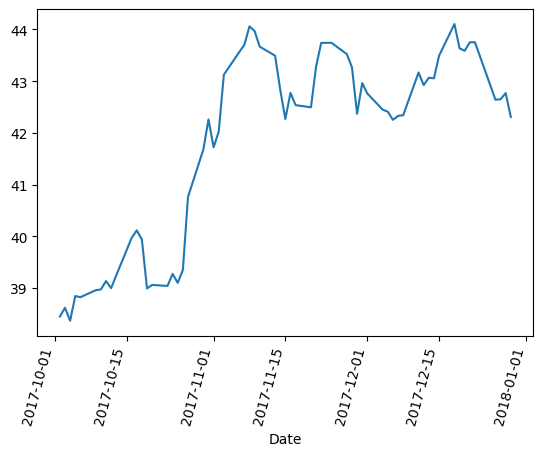

In [4]:
import fix_yahoo_finance as yf

data = yf.download('AAPL','2017-10-01','2018-01-01')
data.Close.plot()
plt.xticks(rotation=75)     # new line added for 3.0

plt.show();

#### Bar Plot
Bar plot is a graph that uses bars to compare different categories of data. Bars can be shown vertically or horizontally based on which axis is used for categorical variable. Let us say we have data on number of icecreames sold every month in an icecream parler over a period of one year. We can visualise the same using a bar plot as shown below.

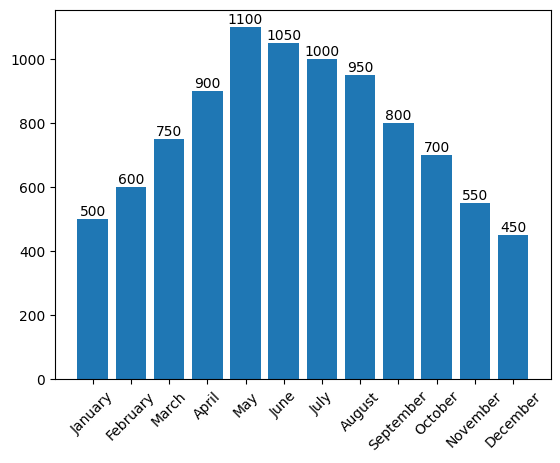

In [5]:
# import numpy and calendar packages
import matplotlib.pyplot as plt
import numpy as np
import calendar

# matplotlib accepts only floating point data types as its arguments for data.
# So months have to be represented in numerical format
month_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
units_sold = [500, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450]

fig, ax = plt.subplots()
# change the month format from number to corresponding month name on x-axis.
plt.xticks(month_num, calendar.month_name[1:13], rotation=45)

# # plot the bar graph
plot = ax.bar(month_num, units_sold)

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')

#Display the graph on the screen
plt.show();

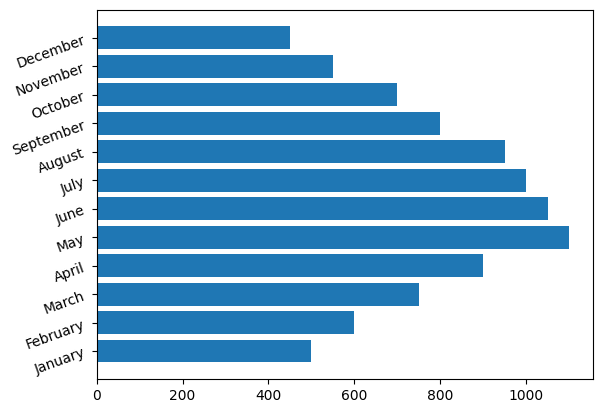

In [7]:
# import numpy and calendar packages
import matplotlib.pyplot as plt
import numpy as np
import calendar

# matplotlib accepts only floating point data types as its arguments for data.
# So months have to be represented in numerical format
month_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
units_sold = [500, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450]

fig, ax = plt.subplots()

# change the month format from number to corresponding month name on x-axis.
plt.yticks(month_num, calendar.month_name[1:13], rotation=20)

# plot horizontal bar graph
plot = plt.barh(month_num, units_sold)

# Display the graph on the screen
plt.show();

#### Scatter Plot
Scatter plot is used to compare two variables and see if there is any co-relation between them. If there are distinct clusters/segements within the data, it will be clear in scatter plot.

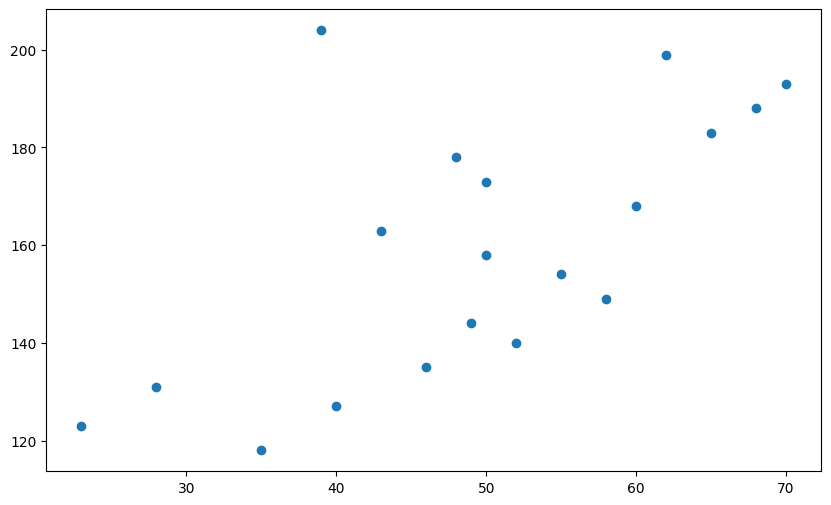

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,6))
age_weight = pd.read_excel('scatter_ex.xlsx', 'age_weight')

x = age_weight['age']
y = age_weight['weight']

plt.scatter(x, y)
plt.show();

clearly there is no relationship between age and weight

__Note:__ Above graphs could have been plotted with plt.plot() method also. scatter() method gives lot more flexibility to customise each of the points with different size, color etc. However, this flexibility comes at the cost of performance. For larger datasets plot() method is lot more faster than scatter() method.

Iris flower plant dataset is the oldest dataset introduced in 1936 by Ronald Fisher. The dataset has 50 examples each of 3 species of iris plants named, setosa, virginica and versicolor. Each example has 4 attributes length and width in centimeters of sepals and petals. This data set is widely used in machine learning for classification and clustering. We will use this dataset to demonstrate how scatter plot can show different clusters within a data set.

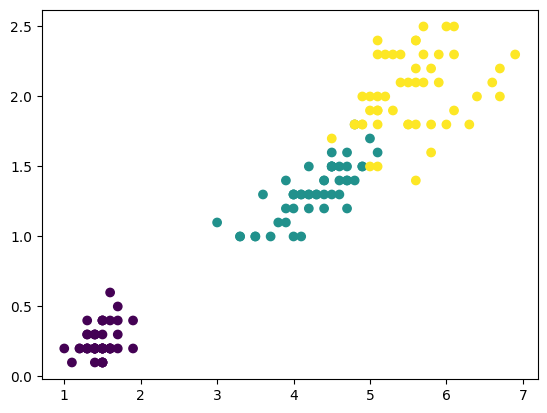

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv('iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})

plt.scatter(iris.petal_length, iris.petal_width, c=iris.species)
plt.show();

#### Bubble Plot


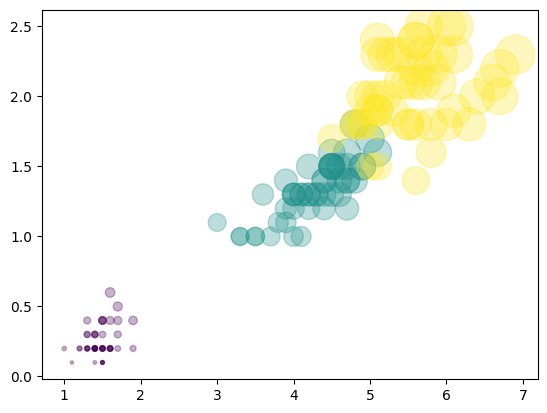

In [11]:
plt.scatter(iris.petal_length, iris.petal_width, s=50*iris.petal_length*iris.petal_width,
            c=iris.species, alpha=0.3)
plt.show();

#### Stacked Plot

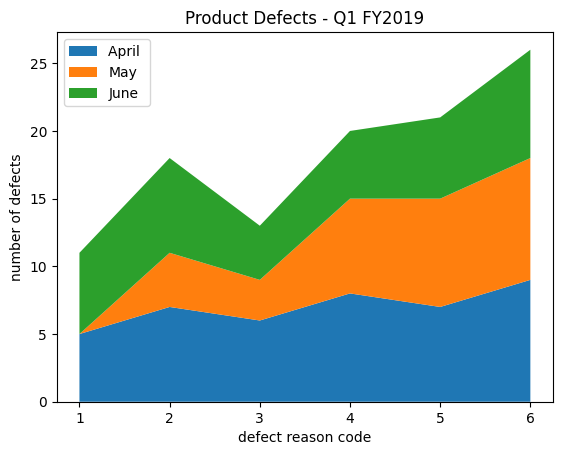

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6], dtype=np.int32)
Apr = [5, 7, 6, 8, 7, 9]
May = [0, 4, 3, 7, 8, 9]
June = [6, 7, 4, 5, 6, 8]

labels = ["April ", "May", "June"]

fig, ax = plt.subplots()
ax.stackplot(x, Apr, May, June, labels=labels)
ax.legend(loc=2)

plt.xlabel('defect reason code')
plt.ylabel('number of defects')
plt.title('Product Defects - Q1 FY2019')

plt.show();

#### Pie Plot
Pie plot is used to represent contribution of various categories/groups to the total. e.g. contribution of each state to that national GDP, contribution of genre of movie to the total number of movies released in a year, student grades(A, B, C, D and E) as a %of total class strength, distribution of monthly house hold spend towards grocery, vegetables, utilities, apparel, education, healthcare etc.

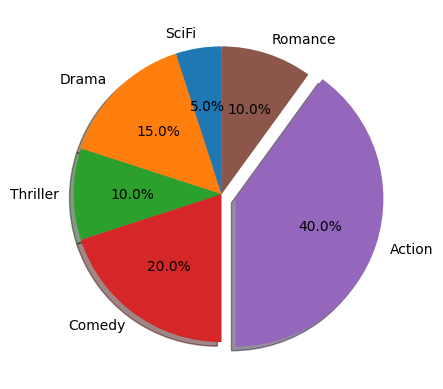

In [13]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['SciFi', 'Drama', 'Thriller', 'Comedy', 'Action', 'Romance']
sizes = [5, 15, 10, 20, 40, 10]   # Add upto 100%
explode = (0, 0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Below line not required for 3.0, for ellptical shape use ax1.axis('auto') or ax1.set_aspect('auto')
#ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Table Chart

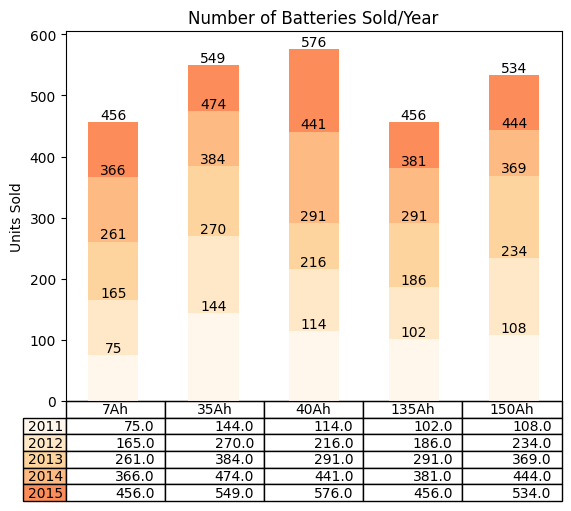

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Represent years in rows in the table
rows = ['2011', '2012', '2013', '2014', '2015']
# Represent battery rating in columns of the table
columns = ('7Ah', '35Ah', '40Ah', '135Ah', '150Ah')

# Number of units sold each year, each rating. e.g. 75 units of 7Ah batteris sold in 2011
data = [[75, 144, 114, 102, 108],
        [90, 126, 102,  84, 126],
        [96, 114,  75, 105, 135],
        [105, 90, 150,  90,  75],
        [90,  75, 135,  75,  90]]

# Define the range and scale for y-axis
values = np.arange(0, 600, 100)

# Specify the color map to be used
colors = plt.cm.OrRd(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)
index = np.arange(len(columns)) + 0.3
bar_width = 0.5

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
fig, ax = plt.subplots()

# Plot bars and create text labels for the table
cell_text = []

for row in range(n_rows):
    plot = plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
    for rect in plot:
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' % int(y_offset[i]),
                ha='center', va='bottom')
        i = i+1

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

plt.ylabel("Units Sold")
plt.title('Number of Batteries Sold/Year')

# No ticks on X-axis, as table below will cover the labels
plt.xticks([])

plt.show()

### Polar Plot

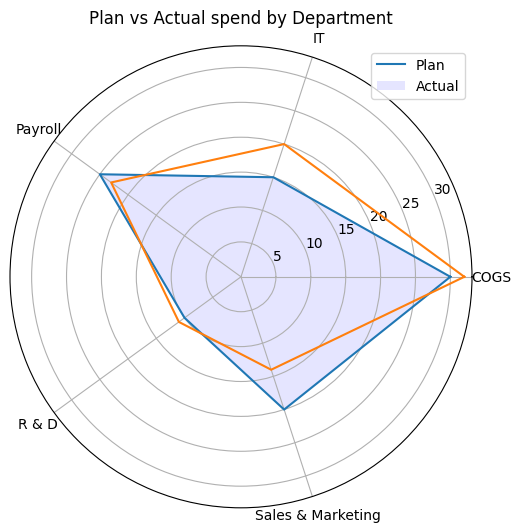

In [14]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Department Names in the Organisation
Depts = ["COGS","IT","Payroll","R & D", "Sales & Marketing"]

# rp is the planned spend for each of the departments respectively for a given year.
# ra is the actual spend.
# Since it is a circular spider web, we need to connect the last point to first point,
# so that circle gets completed.
# In order to achieve this, we need to repeat first department data at the end of the list again.
# Hence, 30 and 32 first entry in each of the lists are repeated at the end again.
rp = [30, 15, 25, 10, 20, 30]
ra = [32, 20, 23, 11, 14, 32]

# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(10,6))
plt.subplot(polar=True)

# Split 2 pie radians(360 degrees) into number of departments equally. matplotlib.pyplot
# accepts in radians only.
# To convert radians to degrees use np.degrees(theta)
theta = np.linspace(0, 2 * np.pi, len(rp))

# Arrange the grid into number of departments equal parts in degrees(NOT in radians here,
# but degrees)
(lines,labels) = plt.thetagrids(range(0,360, int(360/len(Depts))), (Depts))

# Plot planned spend graph, which is a line plot on polar co-ordiantes
plt.plot(theta, rp)
# Fill the area under the line plot
plt.fill(theta, rp, 'b', alpha=0.1)

# Plot actual spend graph, which is a line plot on polar co-ordiantes
plt.plot(theta, ra)

# Add legend and title for the plot
plt.legend(labels=('Plan','Actual'),loc=1)
plt.title("Plan vs Actual spend by Department")

# Dsiplay the plot on the screen
plt.show();

### Histogram Plot
Histogram Plot is used to draw distribution of a continuous variable. Continuous variable values are split into required number of bins and plotted on x-axis and on y-axis number of values that fall in each bin

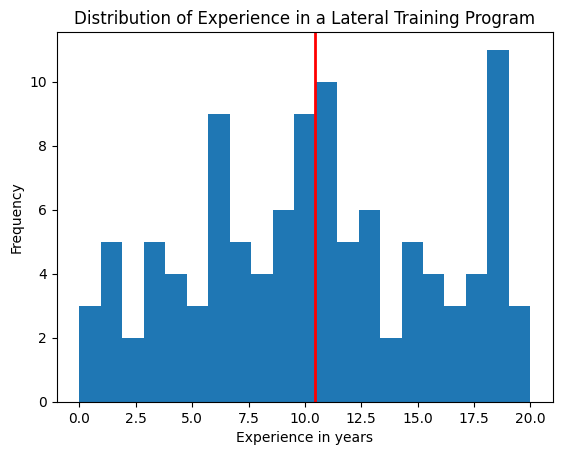

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Define group experience variable as a numpy array

grp_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,
                    15,  16,  18,  13])

# Plot the distribution of Experience
nbins = 21
n, bins, patches = plt.hist(grp_exp, bins = nbins)

# Add axis labels
plt.xlabel("Experience in years")
plt.ylabel("Frequency")
plt.title("Distribution of Experience in a Lateral Training Program")

# Draws the red vertical line in graph at the average experience
plt.axvline(x=grp_exp.mean(), linewidth=2, color = 'r')
plt.show();

# Statistics of DSS Batch experience
print("Mean Experience of DSS Batch: {:4.3f}".format(grp_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(grp_exp.std()))

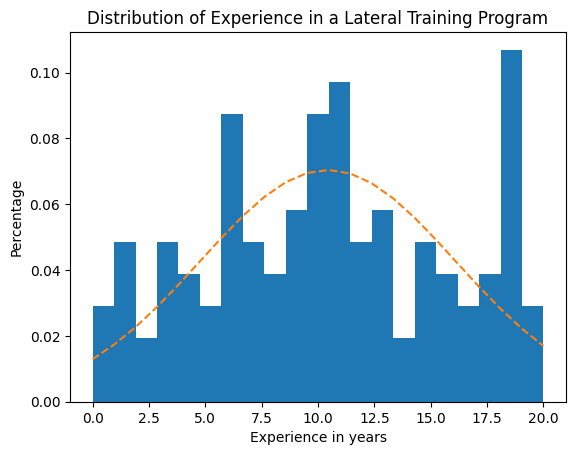

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Define group experience variable as a numpy array

grp_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,
                    15,  16,  18,  13])
# Plot the distribution of Experience
nbins = 21
n, bins, patches = plt.hist(grp_exp, bins = nbins, density=1)
# Add axis labels
plt.xlabel("Experience in years")
plt.ylabel("Percentage")
plt.title("Distribution of Experience in a Lateral Training Program")
mu = grp_exp.mean()
sigma = grp_exp.std()
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--')
plt.show()

# Statistics of DSS Batch experience
print("Mean Experience of DSS Batch: {:4.3f}".format(grp_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(grp_exp.std()))

### Box Plot
Boxplot is used viusalise descriptive statistics of a continuous variable data distribution. It visually shows 1st and 3rd quartile, mean, whiskers at 1.5 times IQR(Inter Quartile Range, the difference between 3rd and 1st quartiles) above which are outliers. If there are no outliears, then whiskers will show min and max values

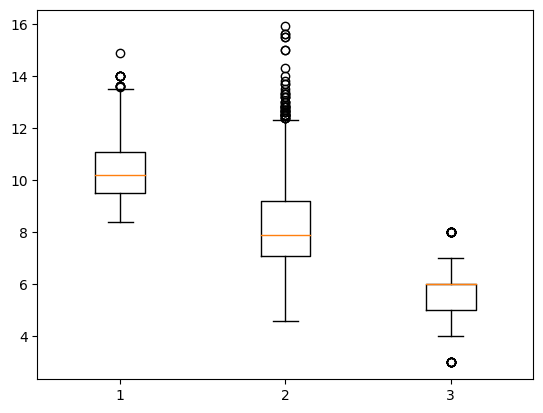

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from a csv file into pandas data frame
wine_quality = pd.read_csv('winequality.csv', delimiter=';')
data = [wine_quality['alcohol'], wine_quality['fixed acidity'], wine_quality['quality']]
plt.boxplot(data)

plt.show()

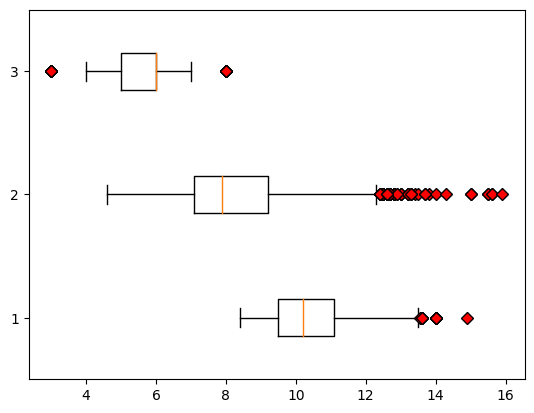

In [17]:
plt.boxplot(data, vert=False, flierprops=dict(markerfacecolor='r', marker='D'))
plt.show();

### Violin Plot

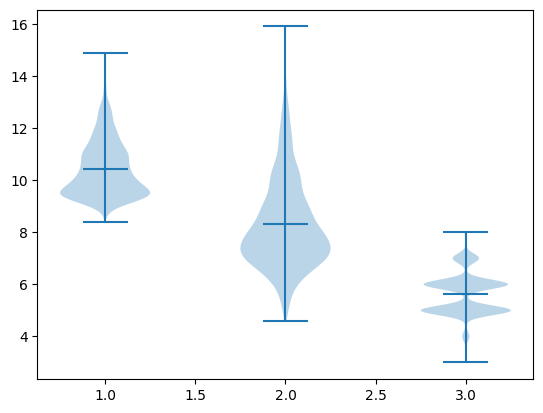

In [18]:
#Import required libraries
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from a csv file into pandas data frame
wine_quality = pd.read_csv('winequality.csv', delimiter=';')
data = [wine_quality['alcohol'], wine_quality['fixed acidity'], wine_quality['quality']]
plt.violinplot(data, showmeans=True)
# print(f"plt: {plt}")
plt.show();

### Reading and Displaying Images

Dimensions of the image:  (600, 800, 3)


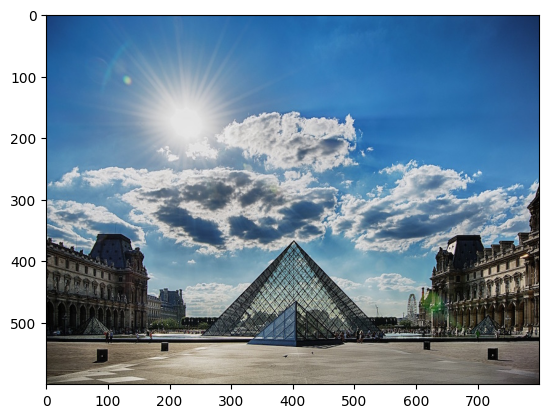

In [19]:
import matplotlib.pyplot as plt
# Read the image louvre.jpg into 3 dimensional array(color images have 3 channels, whereas
# black & white images have one channel only)
image = plt.imread('louvre.jpg')

# Print the dimensions of the image
print("Dimensions of the image: ", image.shape)

# Display the image onto the screen
plt.imshow(image)
plt.show();

### Displaying Images with color bar(Heatmap)

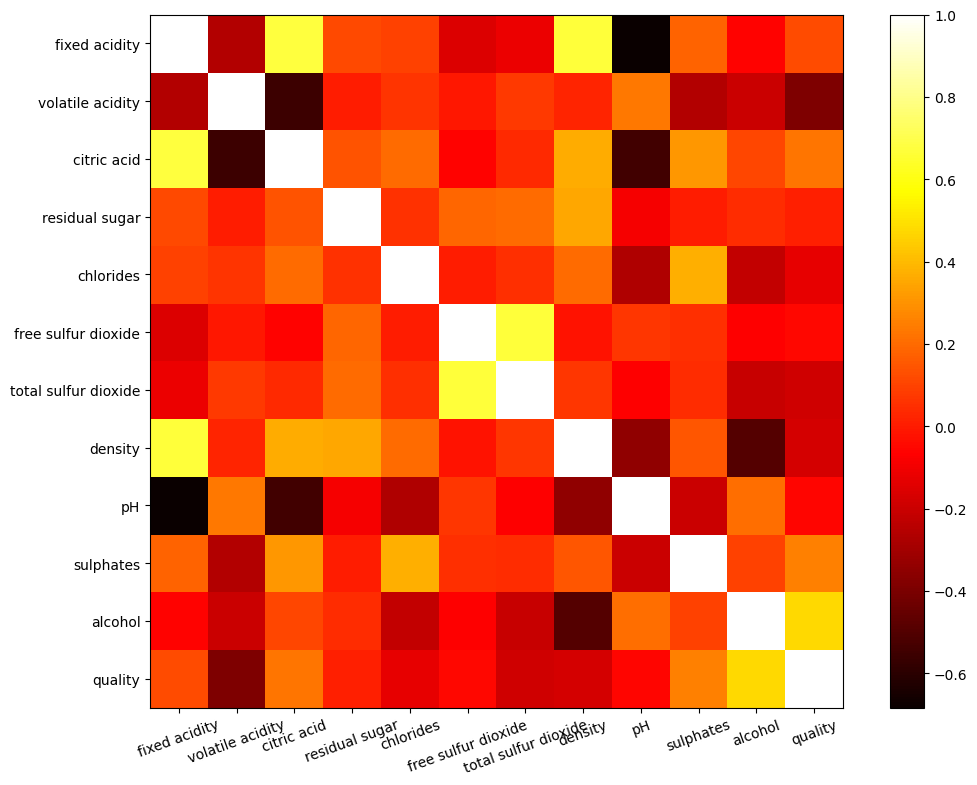

In [20]:
import pandas as pd
# Read the data from a csv file into pandas data frame
wine_quality = pd.read_csv('winequality.csv', delimiter=';')

# Get correlation matrix of all attributes of wine_quality
corr = wine_quality.corr()

plt.figure(figsize=(12,9))
plt.imshow(corr,cmap='hot');
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=20)
plt.yticks(range(len(corr)),corr.columns);

### Hinton Diagram

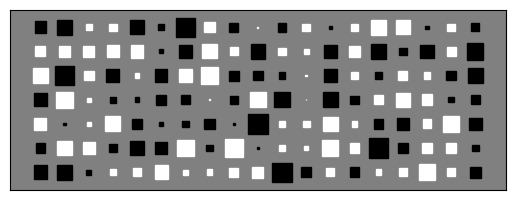

In [21]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matrix = np.asarray((pd.read_excel('weight_matrix.xlsx')))

fig, ax = plt.subplots()

max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for (x, y), w in np.ndenumerate(matrix):
    color = 'white' if w > 0 else 'black'
    size = np.sqrt(np.abs(w) / max_weight)
    rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                         facecolor=color, edgecolor=color)
    ax.add_patch(rect)

ax.autoscale_view()

plt.show()

### Contour Plot
Loss, theta0 and theta1 data are taken from one of the regression problems for plotting the contour plot. If theta0 and theta1 are vectors of size 1 x n, then Loss  will be n x n matrix.

theta0 = np.linspace(-10, 10, 100), and theta1 = np.linspace(-1, 4, 100)
Loss is the error for these range of theta0 and theta1 values.

First we create a meshgrid between theta0 and theta1 to get X and Y, then pass on X, Y, Loss to plot contour plot.

np.logspace(-2,3,20) specifies the range for the loss contours starting from 0.01(10^-2) to 1000(10^3) and take 20 samples in this range.


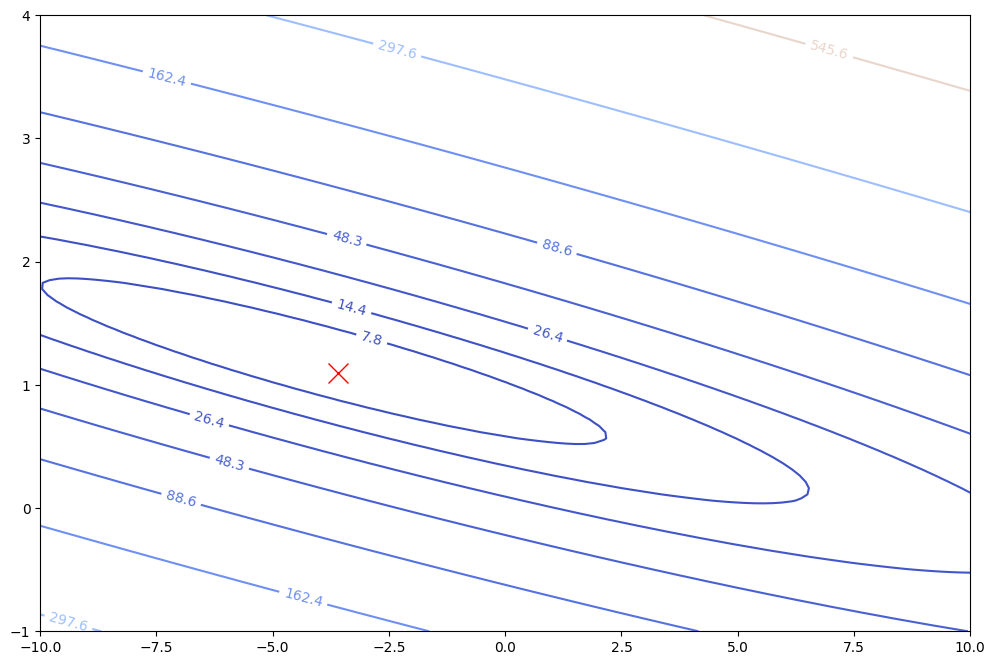

In [22]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm

# Read Loss, theta0 and theta1 values
Loss = pd.read_excel('Loss.xlsx')
theta0_vals = pd.read_excel('theta0.xlsx')
theta1_vals = pd.read_excel('theta1.xlsx')

fig = plt.figure(figsize=(12,8))
X, Y = np.meshgrid(theta0_vals, theta1_vals)
CS = plt.contour(X, Y, Loss, np.logspace(-2,3,20), cmap=cm.coolwarm)
plt.clabel(CS, inline=1, fontsize=10)

# Plot the minimum point(Theta at Minimum cost)
theta = [-3.6, 1.1]
plt.plot(theta[0], theta[1], 'rx', markersize=15, linewidth=2)
plt.show()

### Triangulations

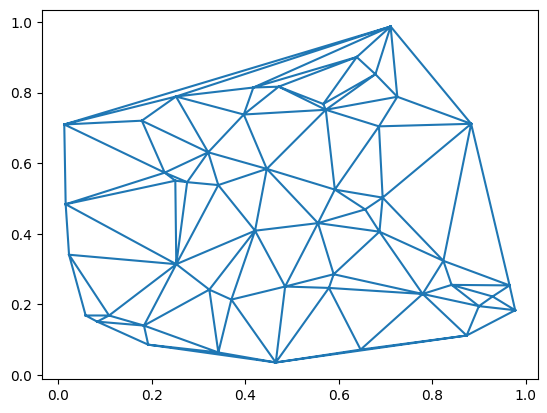

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

data = np.random.rand(50, 2)
triangles = tri.Triangulation(data[:,0], data[:,1])
plt.triplot(triangles)
plt.show()

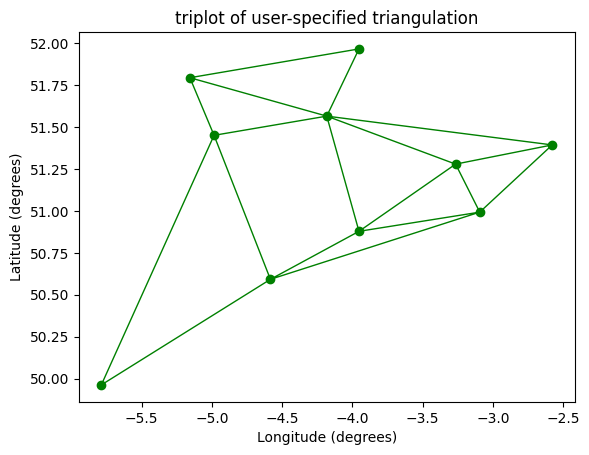

In [24]:
xy = np.array([[-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
               [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
               [-0.090, 0.904], [-0.069, 0.907]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])
triangles = np.array([[1, 2, 3], [3, 4, 5], [4, 5, 6], [2, 5, 6], [6, 7, 8], [6, 8, 9], [0, 1, 7]])
plt.triplot(x, y, triangles, 'go-', lw=1.0)
plt.title('triplot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()

### Stream Plot

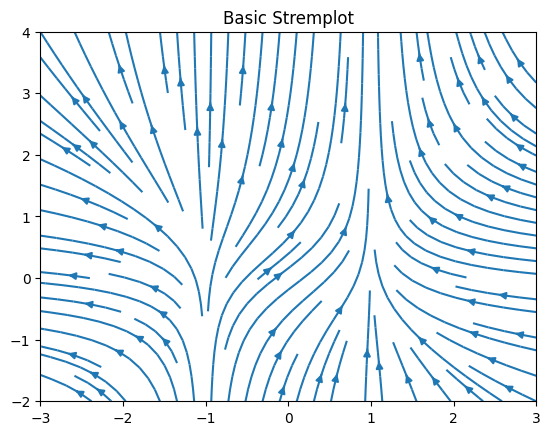

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

x, y = np.linspace(-3,3,100), np.linspace(-2,4,50)
X, Y = np.meshgrid(x, y)
U = 1 - X**2
V = 1 + Y**2
plt.streamplot(X, Y, U, V)
plt.title('Basic Stremplot')
plt.show()

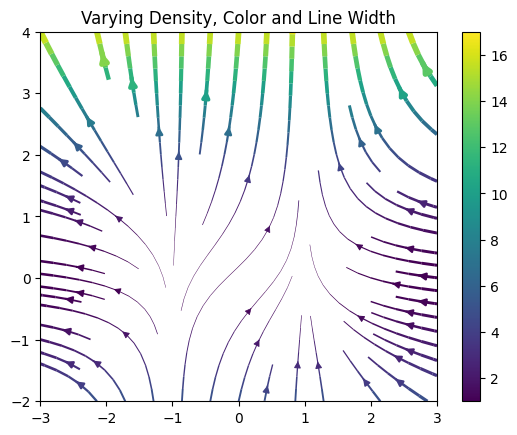

In [28]:
# Define the speed as a function of U amd V
speed = np.sqrt(U*U + V*V)
#  Varying line width along a streamline
lw = 5*speed / speed.max()
strm = plt.streamplot(X, Y, U, V, density=[0.5, 1], color=V, linewidth=lw)
plt.colorbar(strm.lines)
plt.title('Varying Density, Color and Line Width')
plt.show()

### Path

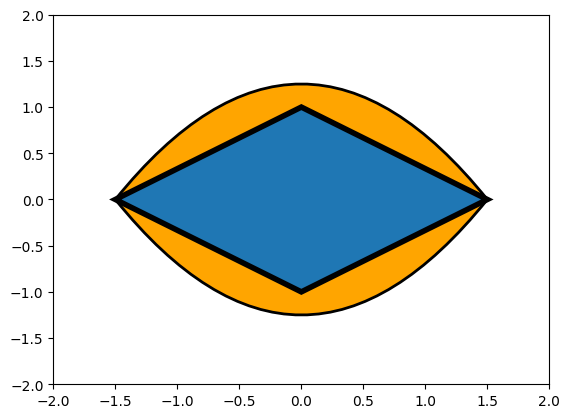

In [29]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# Define the points along with first curve to be drawn
verts1 = [(-1.5, 0.),        # left, bottom
          (0., 1.),          # left, top
          (1.5, 0.),         # right, top
          (0., -1.0),        # right, bottom
          (-1.5, 0.)]        # ignored
# How to draw the plot along above points
codes1 = [Path.MOVETO,       # Go to first point specified in vert1
         Path.LINETO,        # Draw a line from first point to second point
         Path.LINETO,        # Draw another line from current point to next point
         Path.LINETO,        # Draw another line from current point to next point
         Path.CLOSEPOLY]     # Close the loop
# Create complete path with points and lines/curves
path1 = Path(verts1, codes1)
# Repeat the same for 2nd curve
verts2 = [(-1.5, 0.),        # left, bottom
          (0., 2.5),         # left, top
          (1.5, 0.),         # right, top
          (0., -2.5),        # right, bottom
          (-1.5, 0.)]        # ignored
codes2 = [Path.MOVETO,       # Move to the first point
          Path.CURVE3,       # Curve from first point along the control point(2nd point) and terminate on end point(3rd)
          Path.CURVE3,       # Curve from current point along the control point(next point) and terminate on end point(next)
          Path.CURVE3,
          Path.CURVE3]       # close by the curved loop
path2 = Path(verts2, codes2)
# Define the figure
fig = plt.figure()
ax = fig.add_subplot(111)
# zorder overrides default order of plotting different patches. In this case we want second path to be plotted first and
# then first patch so that both are visible. Otherwise smaller patch could hide behind larger one
patch1 = patches.PathPatch(path1, lw=4, zorder=2)
ax.add_patch(patch1)
patch2 = patches.PathPatch(path2, facecolor='orange', lw=2, zorder=1)
ax.add_patch(patch2)
# Set the limits for x and y axis
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()